In [8]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Данные

In [2]:

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv('pima-indians-diabetes.csv', names=names)

## Корреляция

<AxesSubplot:>

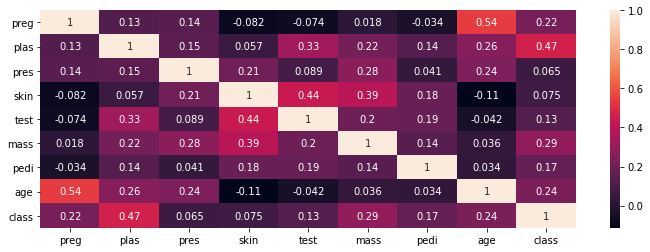

In [3]:
corr = dataframe.corr()
plt.figure(figsize=[12,4])
sns.heatmap(corr, annot=True)

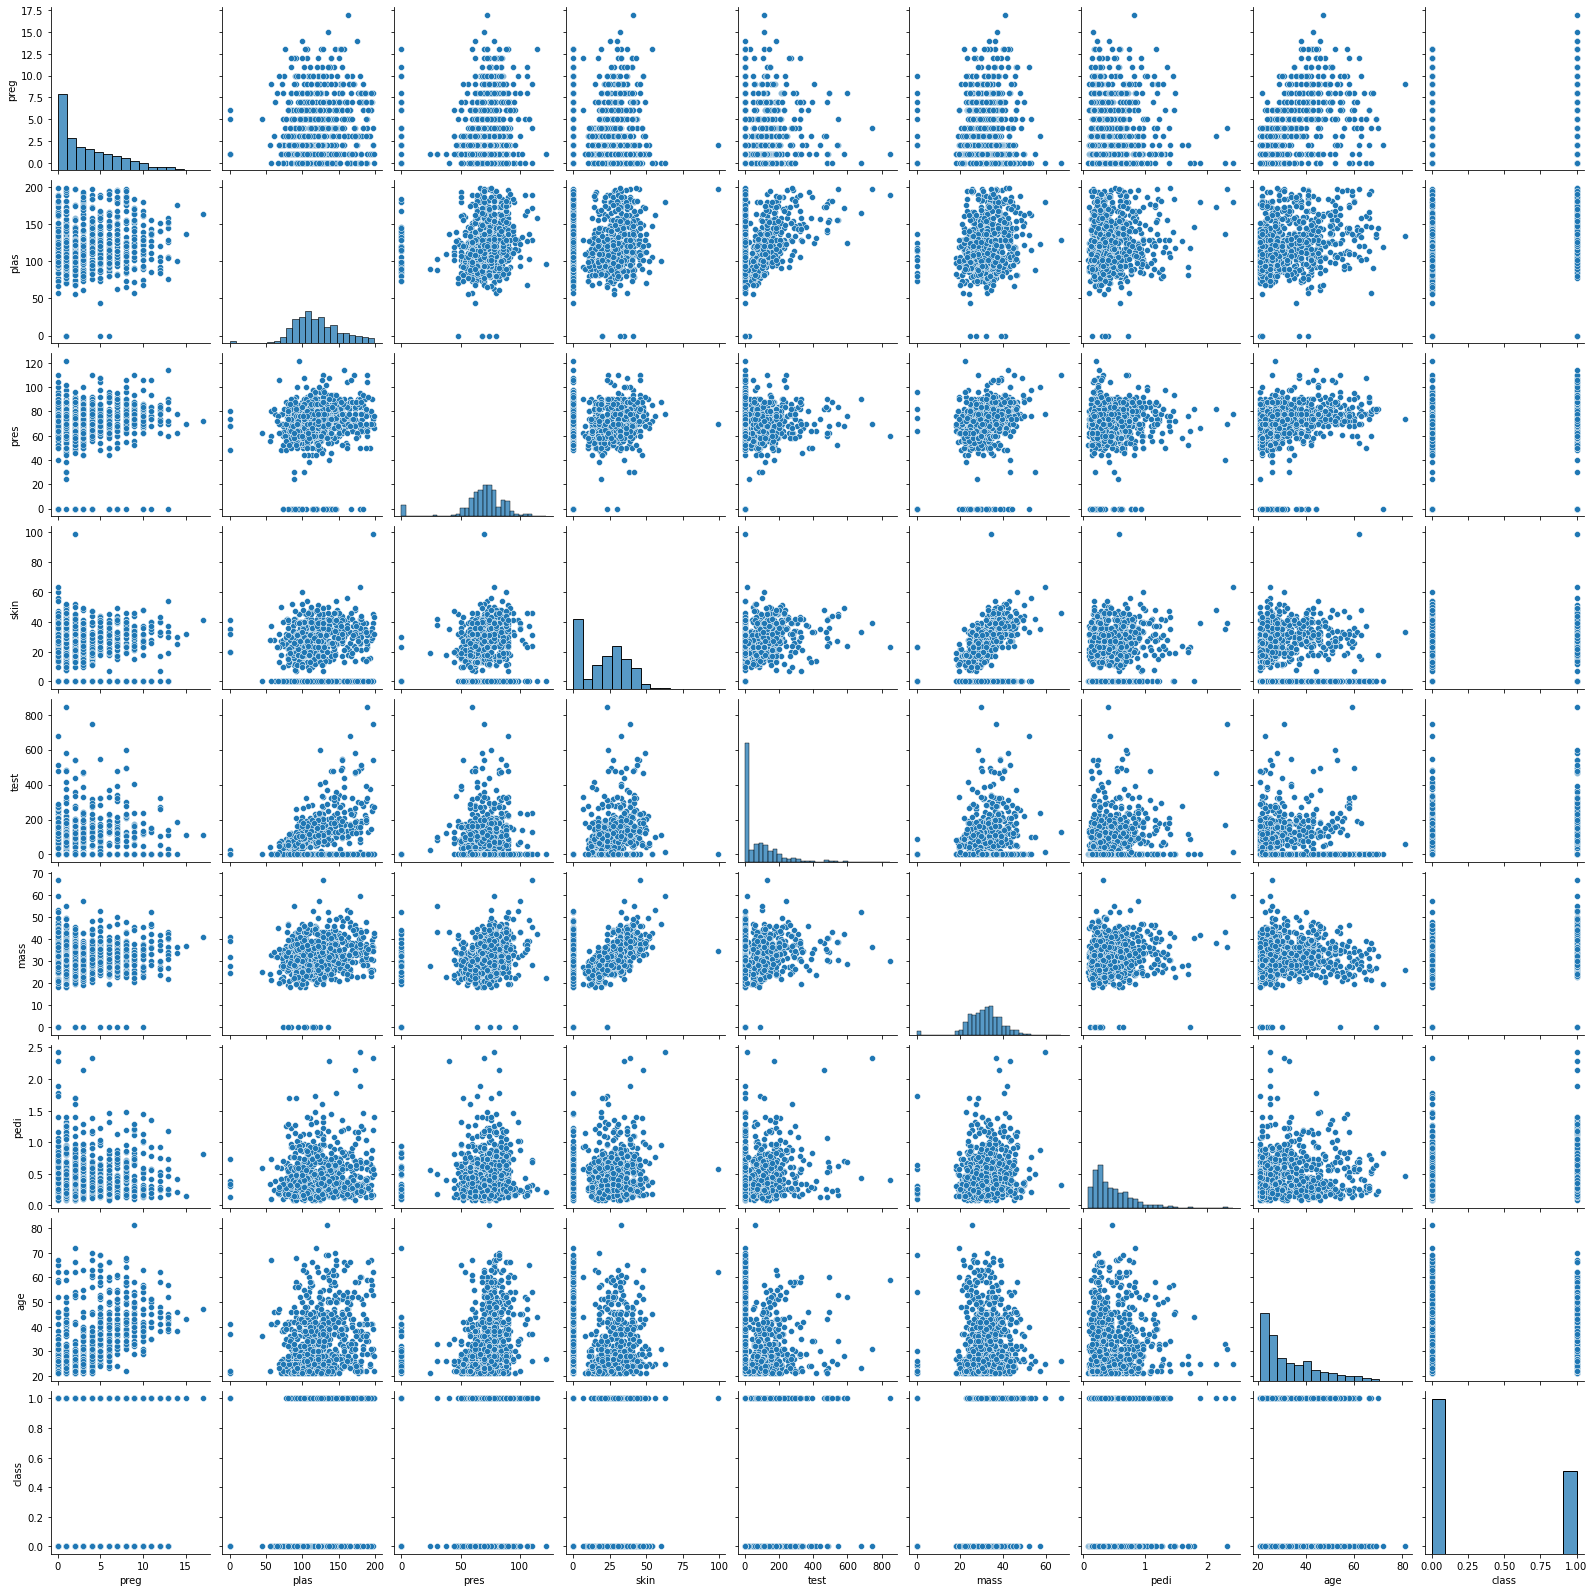

In [4]:
sns.pairplot(dataframe)

## Важность признаков на основе случайного леса

In [5]:

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
for i in range(len(names)-1):
  print(f"{names[i]}\t- {model.feature_importances_[i]:.4f}")

preg	- 0.1075
plas	- 0.2267
pres	- 0.0968
skin	- 0.0818
test	- 0.0765
mass	- 0.1496
pedi	- 0.1174
age	- 0.1437


In [6]:
feature = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

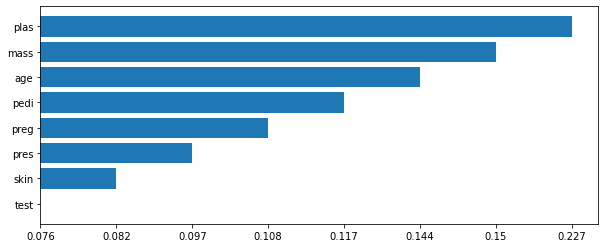

In [9]:
feat_imp_dict = {col:np.round(imp,3) for col,imp in zip(feature,model.feature_importances_)}
feat_imp_dict = np.array(sorted(feat_imp_dict.items(),key=lambda x:x[1]))
labels = list(feat_imp_dict[:,0])
importances = list(feat_imp_dict[:,1])
y_pos = np.arange(len(labels))

plt.figure(figsize=(10,4))
plt.barh(y_pos,importances,align='center')
plt.yticks(y_pos, labels)
_ = plt.show()

## Lasso - L1 регуляризация

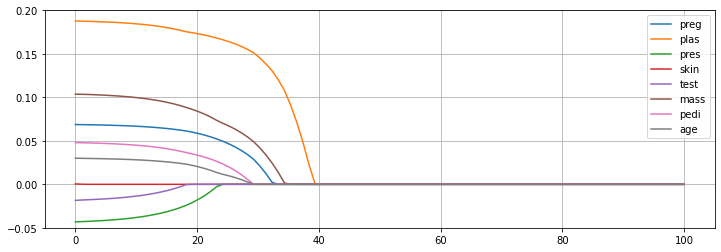

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import  Lasso
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

X_sc = StandardScaler().fit_transform(X)
lg_l,pred_l = [], []

list_l=list(2**np.linspace(-10,10,100))

for i in range(len(list_l)):
  m_l = Lasso(alpha=list_l[i]).fit(X_sc, Y)
  lg_l.append(m_l)
  pred_l.append(m_l.coef_)

plt.figure(figsize=[12,4])
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,np.sign(i)*np.abs(i)) 
plt.ylim(-0.05,0.2)  
plt.legend(names)      
plt.grid() 

## Важность признаков на основе SHAP (SHapley Additive exPlanations)

In [12]:
!pip install shap

distutils: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9/UNKNOWN
sysconfig: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 356 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 18.5 MB 3.3 MB/s eta 0:00:01
Using legacy 'setup.py install' for shap, since package 'wheel' is not installed.
Using legacy 'setup.py install' for numba, since package 'wheel' is not installed.
    Running setup.py install for numba ... error
    ERROR: Command errored out with exit status 1:
     command: /Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/bx/r830khl97tqgprhbv8p2dhsm0000gn/T/pip-install-eh88hjm5/numba_2c68f43d008e4ceeaa260570efc46385/setup.py'"'"'; __file__='"'"'/private/var/folders/

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [13]:
import shap
shap.initjs()

In [14]:
import shap
from sklearn.linear_model import LinearRegression
lin_regr = LinearRegression()
lin_regr.fit(X_sc, Y)


ex = shap.KernelExplainer(lin_regr.predict, X_sc)
shap_values = ex.shap_values(X_sc[0])
shap.force_plot(ex.expected_value, shap_values, X_sc[0])

Using 768 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [15]:
feature = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

In [ ]:
shap_values = ex.shap_values(X_sc)
shap.summary_plot(shap_values, X_sc,feature_names=feature)

  0%|          | 0/768 [00:00<?, ?it/s]